# Task description

## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target

Need to perform clustering to summarize customer segments.

Attributes

### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month


-data available on UCI repository

# Data Collection
# Exploratory Data Analysis (EDA)

# Importing the libraries

In [1]:
# pip install pandas

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [4]:
# pip install sklearn

In [5]:
# pip install scikit-learn

In [6]:
# pip install pyxcel

In [7]:
# pip install openpyxl

In [8]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.spatial.distance import cdist

In [9]:
import datetime
from datetime import date

In [10]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', 100)
pd.set_option('display.max.rows', 100)

# Loading and reading the data from dataset


In [11]:
Data_Original = pd.read_excel('/Users/joydeepdeka/Desktop/data science/projects/my projects/project3/marketing_campaign.xlsx')

In [12]:
Data_Original.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [13]:
Data_Original.shape

(2240, 29)

In [14]:
Data_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [15]:
Data_Original.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [16]:
# directly shows the duplicated rows
Data_Original[Data_Original.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [17]:
Data_Original.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [18]:
#checking the null values in terms of %
(Data_Original.isnull().sum()/Data_Original.count())*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.083032
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

# Create a copy of the DataFrame
# Data Cleaning

In [19]:
Data_Copy = Data_Original.copy()

# Dealing with Null values and Categorical datatypes

In [20]:
Data_Copy.Income.skew()

6.763487372811116

- the above value signifies a positive skewness ie. right skewed, hence we consider the median to fill the missing values

- since the missing values account for >= 1% of values, so we choose to fill the null values instead of removing it

In [21]:
# Calculate the median value
Data_Copy.Income.median()

51381.5

In [22]:
# Replace null values with the mode value
Data_Copy['Income'].fillna(Data_Copy['Income'].median(), inplace=True)

In [23]:
Data_Copy.Income.isna().sum()

0

In [24]:
# renaming some column for easier interpretation
Data_Copy = Data_Copy.rename(columns={"MntWines": "Wines",
                                      "MntFruits":"Fruits",
                                      "MntMeatProducts":"Meat",
                                      "MntFishProducts":"Fish",
                                      "MntSweetProducts":"Sweets",
                                      "MntGoldProds":"Gold"})

In [25]:
Data_Copy.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [26]:
# 'Education' segmentation into three groups
Data_Copy["Education"]=Data_Copy["Education"].replace({"Basic":"Undergraduate",
                                                       "2n Cycle":"Undergraduate",
                                                       "Graduation":"Graduate",
                                                       "Master":"Postgraduate",
                                                       "PhD":"Postgraduate"})

In [27]:
Data_Copy['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [28]:
#'Marital_Status' segmentation into two groups
Data_Copy["Marital_Status"]=Data_Copy["Marital_Status"].replace({"Married":"Together",
                                                                 "Absurd":"Single",
                                                                 "Widow":"Single",
                                                                 "YOLO":"Single",
                                                                 "Divorced":"Single",
                                                                "Alone":"Single"})

In [29]:
Data_Copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Transformation

In [30]:
Data_Copy.nunique()

ID                     2240
Year_Birth               59
Education                 3
Marital_Status            2
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
Wines                   776
Fruits                  158
Meat                    558
Fish                    182
Sweets                  177
Gold                    213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- since 'Z_CostContact' & 'Z_Revenue' contains only single value throughout the dataset, so we omit those 2

In [31]:
Data_Copy.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [32]:
# analysing age wrt. 2015 since the data is of 2 yrs ie. 2013 and 2014
Data_Copy['Age'] = 2015 - Data_Copy['Year_Birth']

In [33]:
#Feature for total members in the house
Data_Copy["Family_Size"] = (Data_Copy["Marital_Status"].replace({"Single": 1, "Together": 2})) + Data_Copy["Kidhome"] + Data_Copy["Teenhome"]

In [34]:
# "Dt_Customer" column to datetime format and calculating months wrt the earliest date in "Dt_Customer"

Data_Copy["Enrolled_Months"] = ((pd.to_datetime('01-01-2015') - pd.to_datetime(Data_Copy["Dt_Customer"]))
                                /pd.Timedelta(days=30)).astype(int)

In [35]:
Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Wines                2240 non-null   int64         
 10  Fruits               2240 non-null   int64         
 11  Meat                 2240 non-null   int64         
 12  Fish                 2240 non-null   int64         
 13  Sweets               2240 non-nul

In [36]:
Data_Copy.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Enrolled_Months
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1,28
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,3,9
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,2,16
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,3,10
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,3,11
5,7446,1967,Postgraduate,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,48,3,15
6,965,1971,Graduate,Single,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,44,2,25
7,6177,1985,Postgraduate,Together,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,30,3,20
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,41,3,19
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,65,4,9


In [37]:
Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Wines                2240 non-null   int64         
 10  Fruits               2240 non-null   int64         
 11  Meat                 2240 non-null   int64         
 12  Fish                 2240 non-null   int64         
 13  Sweets               2240 non-nul

# Data Integration

###### considering Age_Group
- age <= 19, teens
- 20 < age <= 39, adults
- 40 < age <= 59, middle age adults
- 59 < age, seniors


In [38]:
# creating the AgeGroup feature
Data_Copy.loc[ Data_Copy.Age <= 19 , 'AgeGroup' ] = 'Teen'
Data_Copy.loc[ (Data_Copy.Age > 19) & (Data_Copy.Age <= 39), 'AgeGroup' ] = 'Adults'
Data_Copy.loc[ (Data_Copy.Age > 39) & (Data_Copy.Age <= 59), 'AgeGroup' ] = 'Middle Age Adults'
Data_Copy.loc[ Data_Copy.Age > 59, 'AgeGroup' ] = 'Seniors'

In [39]:
# Sum the values of the specified columns and store the total in "Products_Spent"
Data_Copy["Products_Spent"] = Data_Copy[["Wines",
                                         "Fruits",
                                         "Meat",
                                         "Fish",
                                         "Sweets",
                                         "Gold"]].sum(axis=1)


In [40]:
# Sum the values of the specified columns and store the total in "Place_Spent"
Data_Copy["Place_Spent"] = Data_Copy[["NumWebPurchases",
                                      "NumCatalogPurchases",
                                      "NumStorePurchases",
                                      "NumWebVisitsMonth"]].sum(axis=1)


In [41]:
# Sum the values of the specified columns and store the total in "Promotion_Spent"
Data_Copy["Promotion_Spent"] = Data_Copy[["NumDealsPurchases",
                                          "AcceptedCmp3",
                                          "AcceptedCmp4",
                                          "AcceptedCmp5",
                                          "AcceptedCmp1",
                                          "AcceptedCmp2"]].sum(axis=1)


In [42]:
Data_Copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Family_Size,Enrolled_Months,AgeGroup,Products_Spent,Place_Spent,Promotion_Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1,28,Middle Age Adults,1617,29,3
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,3,9,Seniors,27,9,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,2,16,Middle Age Adults,776,24,1
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,3,10,Adults,53,12,2
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,3,11,Adults,422,19,5


In [43]:
Data_Copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Family_Size',
       'Enrolled_Months', 'AgeGroup', 'Products_Spent', 'Place_Spent',
       'Promotion_Spent'],
      dtype='object')

# Droping the columns which are duplications in dataset

In [44]:
# Drop the  columns from the dataset
Data_Copy.drop(["ID","Year_Birth","Dt_Customer",'Kidhome','Teenhome',
                'Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold',
                'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                'NumDealsPurchases','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',], axis=1, inplace=True)

In [45]:
Data_Copy.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,AgeGroup,Products_Spent,Place_Spent,Promotion_Spent
0,Graduate,Single,58138.0,58,0,1,58,1,28,Middle Age Adults,1617,29,3
1,Graduate,Single,46344.0,38,0,0,61,3,9,Seniors,27,9,2
2,Graduate,Together,71613.0,26,0,0,50,2,16,Middle Age Adults,776,24,1
3,Graduate,Together,26646.0,26,0,0,31,3,10,Adults,53,12,2
4,Postgraduate,Together,58293.0,94,0,0,34,3,11,Adults,422,19,5


# EDA

### Univariate Analysis

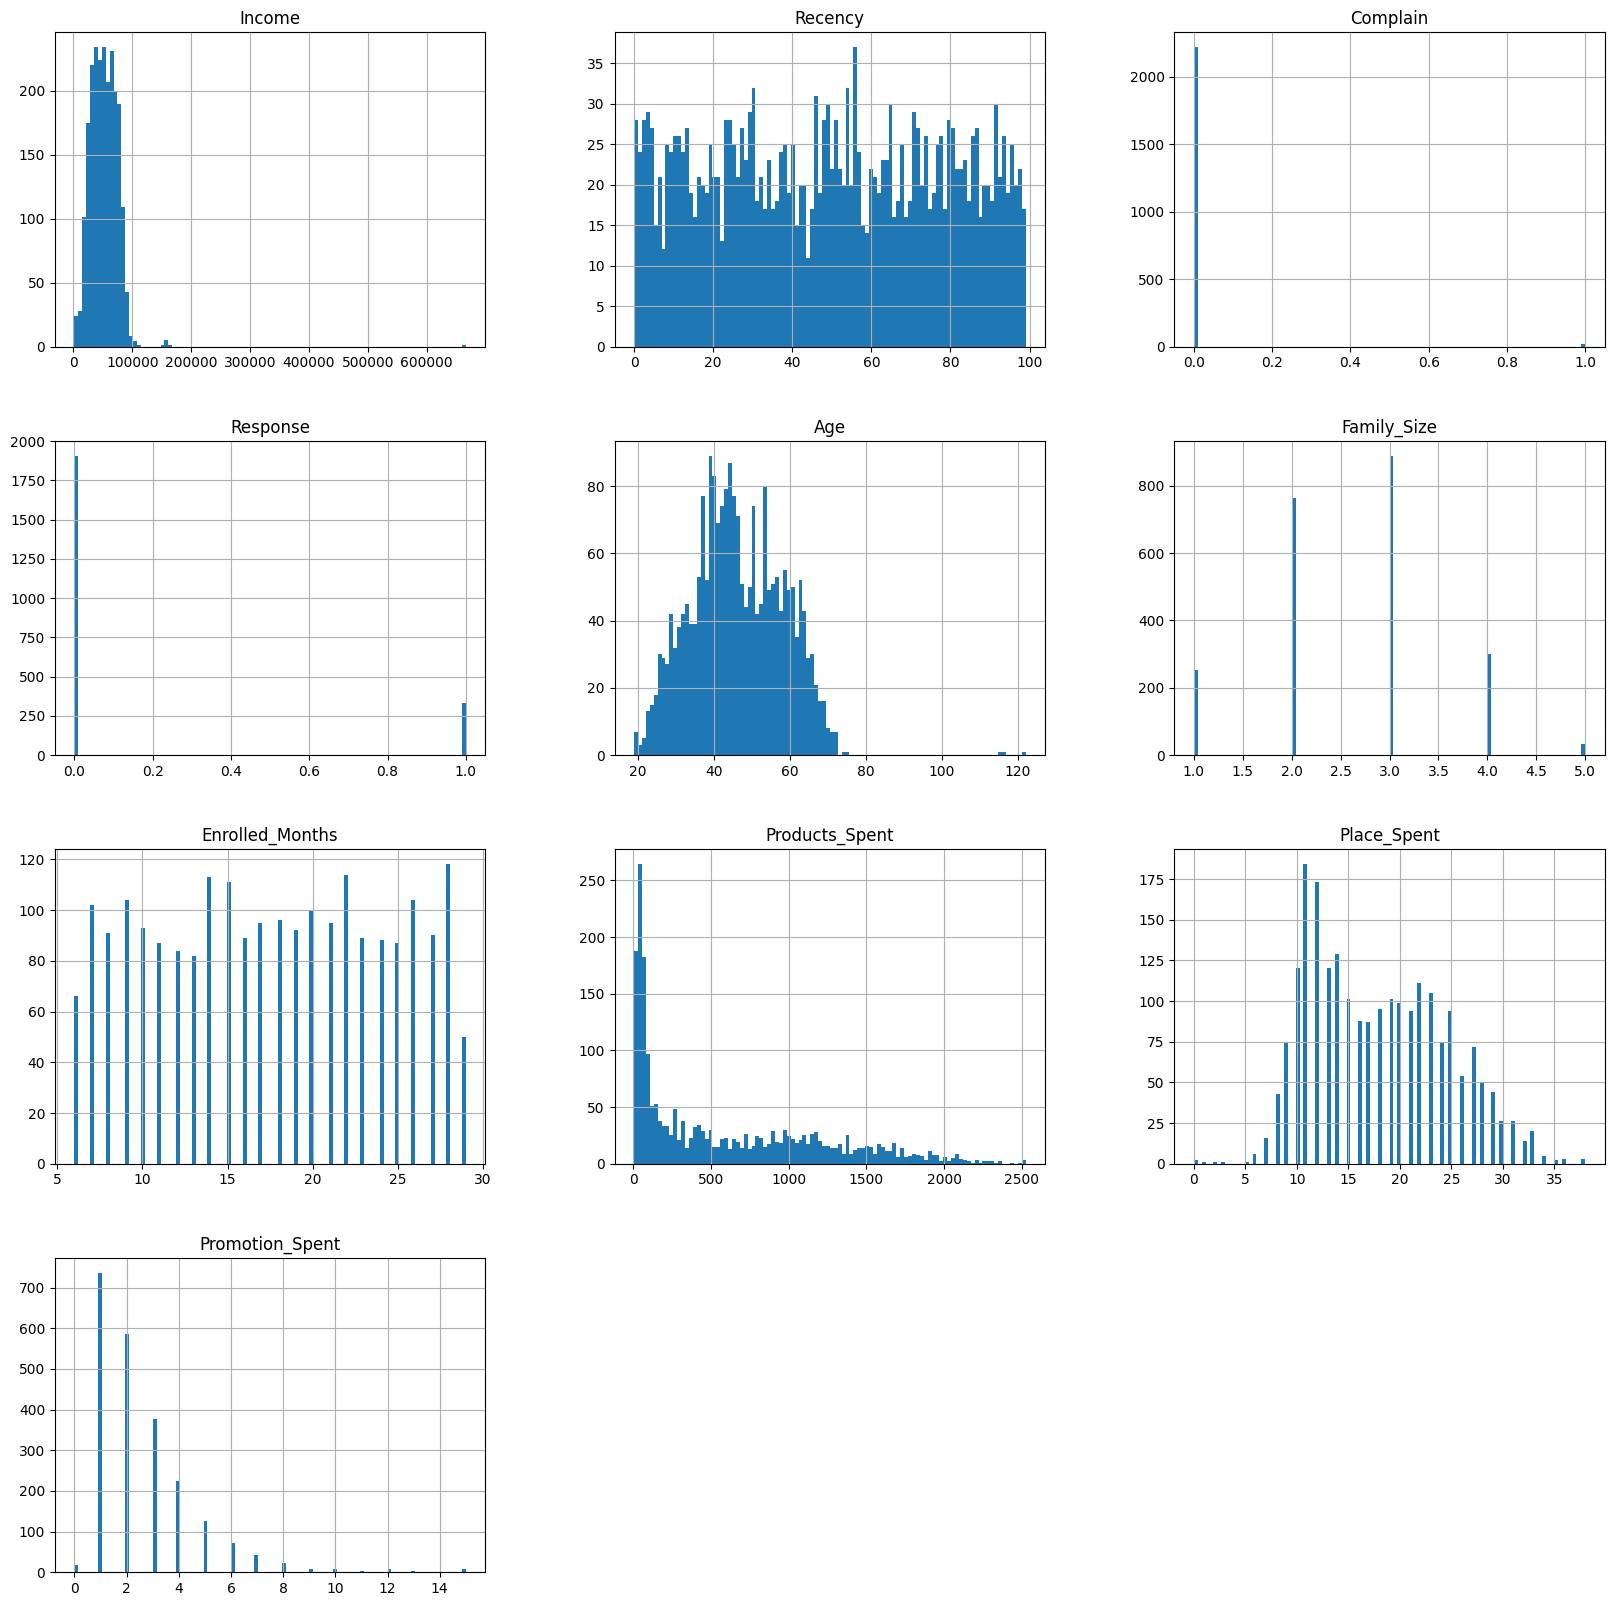

In [46]:
Data_Copy.hist(figsize = (20,20), bins = 100)
plt.show()

- most of the data are right skewed like Income, Age, Products_Spent and Promotion_Spent while others are normally distributed
- Income and Age respectively shows probability of outliers being present in them

### 1. Marital_Group

In [47]:
# marital_group
marital_group = Data_Copy.groupby("Marital_Status").agg(TotalRecords = ('Marital_Status', 'size'),
                                                TotalAmount = ('Products_Spent', 'sum'),
                                                AvgAmount = ('Products_Spent', 'mean'))
marital_group

,TotalRecords,TotalAmount,AvgAmount
Marital_Status,,,
Single,796,493670,620.188442
Together,1444,863318,597.865651


-the avg. of singles is more {eg. there might be widows taking care of their childre}

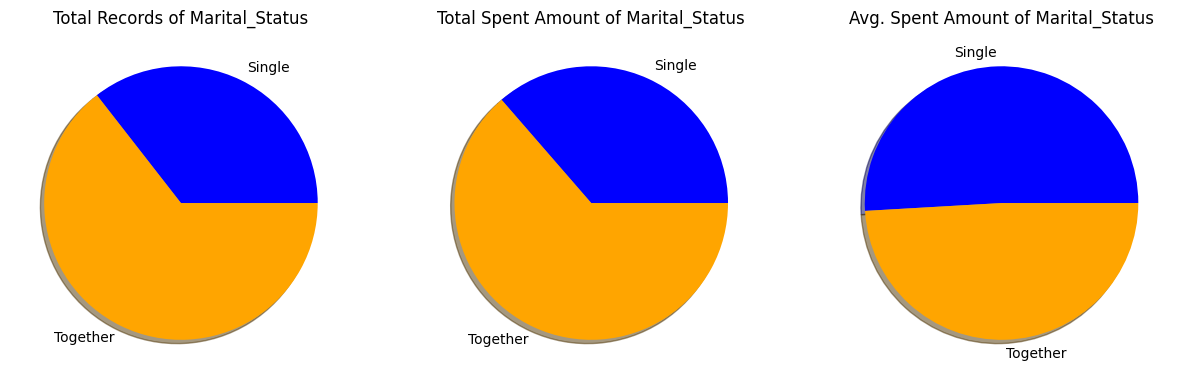

In [48]:
# pie chart for the observation

plt.figure(figsize = (15,10))

plt.subplot(1,3,1) # 1 row 3 column on the first chart
plt.pie(x = marital_group.TotalRecords, labels = marital_group.index, colors = ['blue','orange'], shadow = True)
plt.title(f"Total Records of {marital_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,2) # 1 row 3 column on the second chart
plt.pie(x = marital_group.TotalAmount, labels = marital_group.index, colors = ['blue','orange'], shadow = True)
plt.title(f"Total Spent Amount of {marital_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,3) # 1 row 3 column on the third chart
plt.pie(x = marital_group.AvgAmount, labels = marital_group.index, colors = ['blue','orange'], shadow = True)
plt.title(f"Avg. Spent Amount of {marital_group.index.name}") #keeping the command dynamic

plt.show()

- on avg. singles give more values to the business as a whole

### 2. Family Group

In [49]:
# family_group
family_group = Data_Copy.groupby("Family_Size").agg(TotalRecords = ('Family_Size', 'size'),
                                                TotalAmount = ('Products_Spent', 'sum'),
                                                AvgAmount = ('Products_Spent', 'mean'))
family_group

,TotalRecords,TotalAmount,AvgAmount
Family_Size,,,
1,254,280772,1105.401575
2,764,599770,785.039267
3,889,391670,440.573678
4,301,74903,248.847176
5,32,9873,308.531250


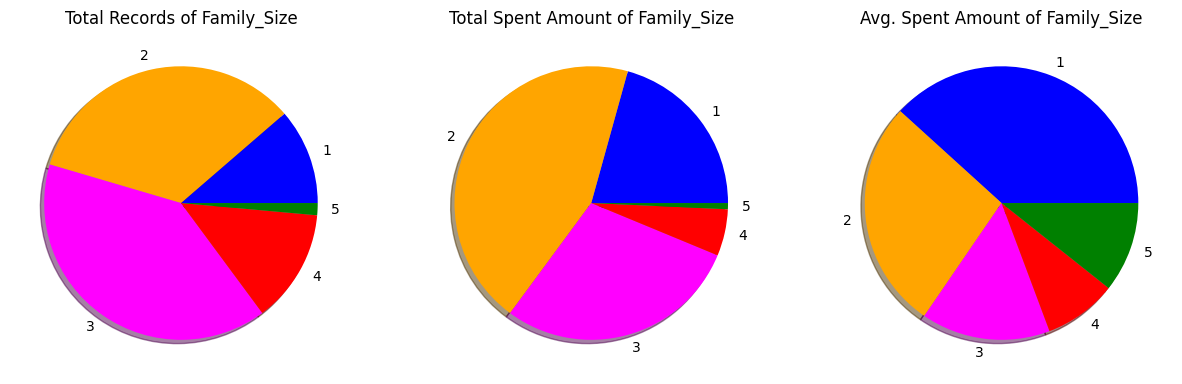

In [50]:
# pie chart for the observation

plt.figure(figsize = (15,10))

plt.subplot(1,3,1) # 1 row 3 column on the first chart
plt.pie(x = family_group.TotalRecords, labels = family_group.index, colors = ['blue','orange','magenta','red','green'], shadow = True)
plt.title(f"Total Records of {family_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,2) # 1 row 3 column on the second chart
plt.pie(x = family_group.TotalAmount, labels = family_group.index, colors = ['blue','orange','magenta','red','green'], shadow = True)
plt.title(f"Total Spent Amount of {family_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,3) # 1 row 3 column on the third chart
plt.pie(x = family_group.AvgAmount, labels = family_group.index, colors = ['blue','orange','magenta','red','green'], shadow = True)
plt.title(f"Avg. Spent Amount of {family_group.index.name}") #keeping the command dynamic

plt.show()

- even though the strength of singles is the second least, their avg. spending is the highest making them the best potential customer from a business standpoint

### 3. Age Group

In [51]:
# AgeGroup
age_group = Data_Copy.groupby("AgeGroup").agg(TotalRecords = ('AgeGroup', 'size'),
                                                TotalAmount = ('Products_Spent', 'sum'),
                                                AvgAmount = ('Products_Spent', 'mean'))
age_group

,TotalRecords,TotalAmount,AvgAmount
AgeGroup,,,
Adults,693,375849,542.350649
Middle Age Adults,1177,707996,601.525913
Seniors,368,273005,741.861413
Teen,2,138,69.000000


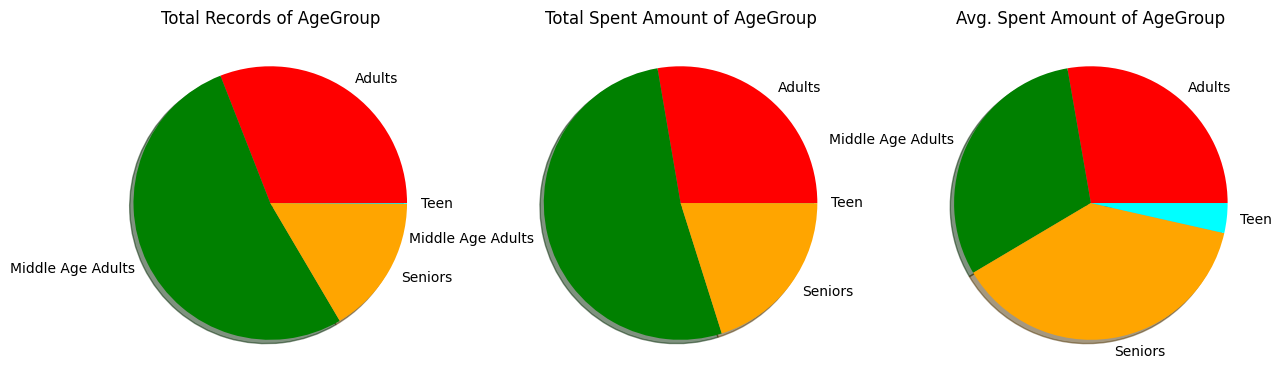

In [52]:
# pie chart for the observation

plt.figure(figsize = (15,10))

plt.subplot(1,3,1) # 1 row 3 column on the first chart
plt.pie(x = age_group.TotalRecords, labels = age_group.index, colors = ['red','green','orange','cyan'], shadow = True)
plt.title(f"Total Records of {age_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,2) # 1 row 3 column on the second chart
plt.pie(x = age_group.TotalAmount, labels = age_group.index, colors = ['red','green','orange','cyan'], shadow = True)
plt.title(f"Total Spent Amount of {age_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,3) # 1 row 3 column on the third chart
plt.pie(x = age_group.AvgAmount, labels = age_group.index, colors = ['red','green','orange','cyan'], shadow = True)
plt.title(f"Avg. Spent Amount of {age_group.index.name}") #keeping the command dynamic

plt.show()

- teens are the least in value in total but a considerable one on average
- total amt. spent by the middle age adults are the highest since they are probably at the peak of their earnings
- avg. amt. spent by the seniors is the highest even though it's closer to middle age adults

### 4. Education Group

In [53]:
# education group
education_group = Data_Copy.groupby("Education").agg(TotalRecords = ('Education', 'size'),
                                                TotalAmount = ('Products_Spent', 'sum'),
                                                AvgAmount = ('Products_Spent', 'mean'))
education_group

,TotalRecords,TotalAmount,AvgAmount
Education,,,
Graduate,1127,698626,619.898846
Postgraduate,856,553150,646.203271
Undergraduate,257,105212,409.385214


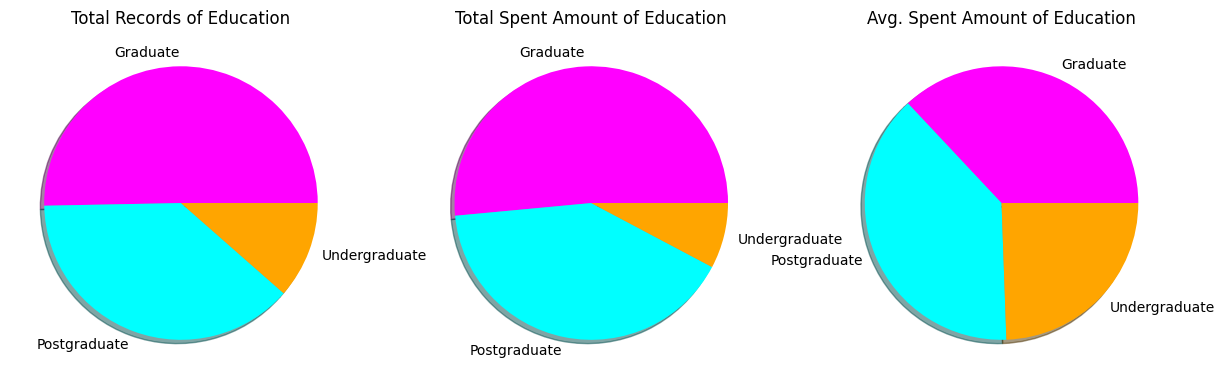

In [54]:
# pie chart for the observation

plt.figure(figsize = (15,10))

plt.subplot(1,3,1) # 1 row 3 column on the first chart
plt.pie(x = education_group.TotalRecords, labels = education_group.index, colors = ['magenta','cyan','orange'], shadow = True)
plt.title(f"Total Records of {education_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,2) # 1 row 3 column on the second chart
plt.pie(x = education_group.TotalAmount, labels = education_group.index, colors = ['magenta','cyan','orange'], shadow = True)
plt.title(f"Total Spent Amount of {education_group.index.name}") #keeping the command dynamic

plt.subplot(1,3,3) # 1 row 3 column on the third chart
plt.pie(x = education_group.AvgAmount, labels = education_group.index, colors = ['magenta','cyan','orange'], shadow = True)
plt.title(f"Avg. Spent Amount of {education_group.index.name}") #keeping the command dynamic

plt.show()

- postgraduates hold the highest in all three categories

In [55]:
Data_Copy.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,AgeGroup,Products_Spent,Place_Spent,Promotion_Spent
0,Graduate,Single,58138.0,58,0,1,58,1,28,Middle Age Adults,1617,29,3
1,Graduate,Single,46344.0,38,0,0,61,3,9,Seniors,27,9,2
2,Graduate,Together,71613.0,26,0,0,50,2,16,Middle Age Adults,776,24,1
3,Graduate,Together,26646.0,26,0,0,31,3,10,Adults,53,12,2
4,Postgraduate,Together,58293.0,94,0,0,34,3,11,Adults,422,19,5


In [56]:
Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2240 non-null   object 
 1   Marital_Status   2240 non-null   object 
 2   Income           2240 non-null   float64
 3   Recency          2240 non-null   int64  
 4   Complain         2240 non-null   int64  
 5   Response         2240 non-null   int64  
 6   Age              2240 non-null   int64  
 7   Family_Size      2240 non-null   int64  
 8   Enrolled_Months  2240 non-null   int64  
 9   AgeGroup         2240 non-null   object 
 10  Products_Spent   2240 non-null   int64  
 11  Place_Spent      2240 non-null   int64  
 12  Promotion_Spent  2240 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 227.6+ KB


In [57]:
# # Drop the specified columns for modelling purpose
Data_Copy = Data_Copy.drop(['AgeGroup','Marital_Status'], axis=1)

In [58]:
Data_Copy.shape

(2240, 11)

In [59]:
Data_Copy.head(10)

,Education,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent
0,Graduate,58138.0,58,0,1,58,1,28,1617,29,3
1,Graduate,46344.0,38,0,0,61,3,9,27,9,2
2,Graduate,71613.0,26,0,0,50,2,16,776,24,1
3,Graduate,26646.0,26,0,0,31,3,10,53,12,2
4,Postgraduate,58293.0,94,0,0,34,3,11,422,19,5
5,Postgraduate,62513.0,16,0,0,48,3,15,716,26,2
6,Graduate,55635.0,34,0,0,44,2,25,590,23,4
7,Postgraduate,33454.0,32,0,0,30,3,20,169,16,2
8,Postgraduate,30351.0,19,0,1,41,3,19,46,14,1
9,Postgraduate,5648.0,68,0,0,65,4,9,49,21,2


### Performing one hot encoding on 'Education'

In [60]:
# one-hot encoding
Data_Copy = pd.get_dummies(Data_Copy, columns=['Education']) #inplace command can't be used here

### Heatmap for Correlation

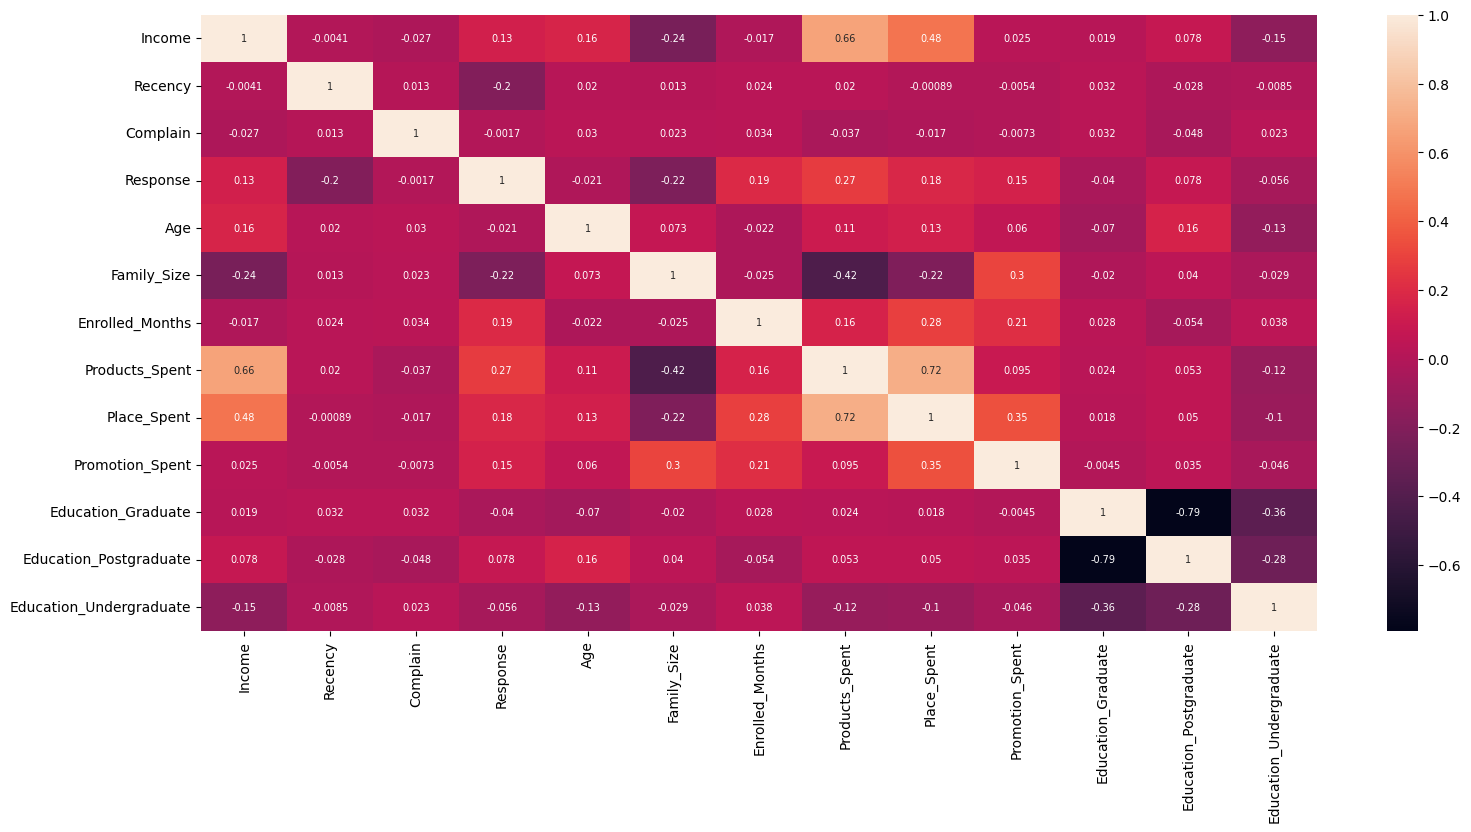

In [61]:
# heatmap for correlation
plt.figure(figsize=(18, 8))
sns.heatmap(Data_Copy.corr(), annot=True, annot_kws={'fontsize': 7})
plt.show()

In [62]:
Data_Copy.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,0,1,58,1,28,1617,29,3,True,False,False
1,46344.0,38,0,0,61,3,9,27,9,2,True,False,False
2,71613.0,26,0,0,50,2,16,776,24,1,True,False,False
3,26646.0,26,0,0,31,3,10,53,12,2,True,False,False
4,58293.0,94,0,0,34,3,11,422,19,5,False,True,False


# Handling Outliers

<Axes: >

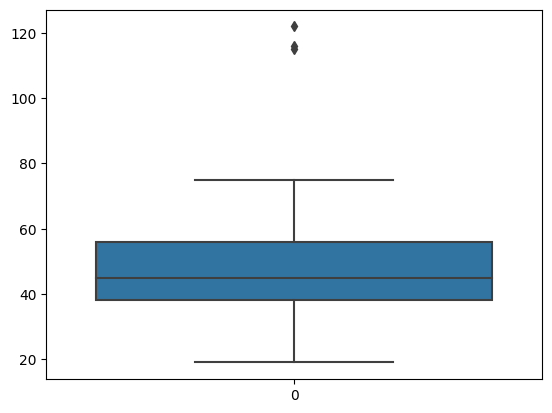

In [63]:
# checking outliers for 'Age'
sns.boxplot(Data_Copy['Age'])

In [64]:
Q1 = Data_Copy['Age'].quantile(0.25)
Q3 = Data_Copy['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR  # Adjust the multiplier as needed
upper_threshold = Q3 + 1.5 * IQR

# Removing outliers
Data_Modelling = Data_Copy[(Data_Copy['Age'] >= lower_threshold) & (Data_Copy['Age'] <= upper_threshold)]

<Axes: >

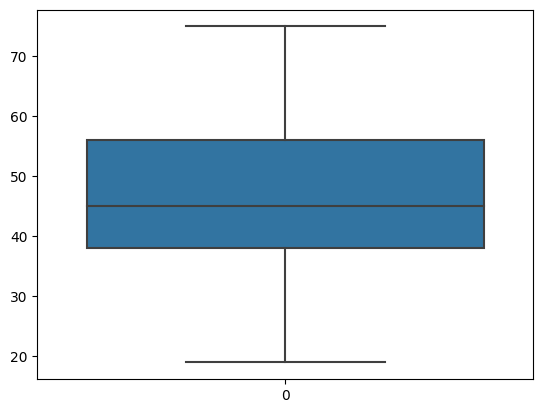

In [65]:
sns.boxplot(Data_Modelling['Age'])

<Axes: >

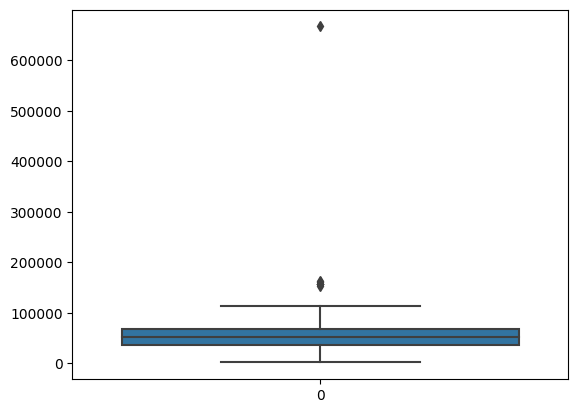

In [66]:
# checking outliers for income
sns.boxplot(Data_Copy['Income'])

In [67]:
Q1 = Data_Copy['Income'].quantile(0.25)
Q3 = Data_Copy['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR  # Adjust the multiplier as needed
upper_threshold = Q3 + 1.5 * IQR

# Removing outliers
Data_Modelling = Data_Copy[(Data_Copy['Income'] >= lower_threshold) & (Data_Copy['Income'] <= upper_threshold)]


<Axes: >

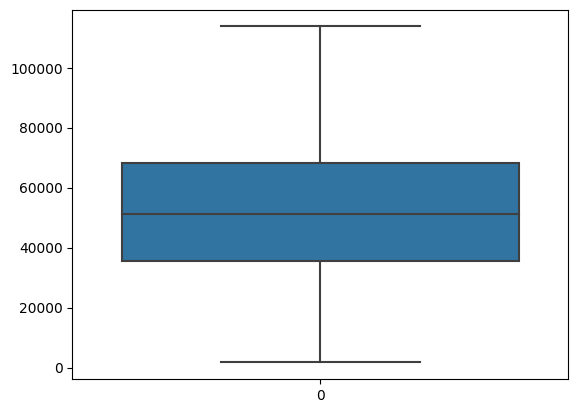

In [68]:
sns.boxplot(Data_Modelling['Income'])

In [69]:
Data_Copy.shape

(2240, 13)

In [70]:
Data_Modelling.shape

(2232, 13)

In [71]:
Data_Modelling.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,0,1,58,1,28,1617,29,3,True,False,False
1,46344.0,38,0,0,61,3,9,27,9,2,True,False,False
2,71613.0,26,0,0,50,2,16,776,24,1,True,False,False
3,26646.0,26,0,0,31,3,10,53,12,2,True,False,False
4,58293.0,94,0,0,34,3,11,422,19,5,False,True,False


# Model Building

## KMeans

In [72]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [73]:
model = KMeans()
model.fit(Data_Modelling)

KMeans()

In [74]:
model.labels_

array([7, 3, 1, ..., 7, 1, 3], dtype=int32)

In [75]:
clusterRange = range(2,21)
inertiaRange = []
silhouterange = []


for m in clusterRange:
    
    model_m = KMeans(n_clusters = m, init='random')
    model_m.fit(Data_Modelling)
    inertiaRange.append(model_m.inertia_)
    silhouterange.append(metrics.silhouette_score(Data_Modelling, model_m.labels_))

In [76]:
print(list(clusterRange))
print()
print(inertiaRange)
print()
print(silhouterange)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

[271872870918.12115, 136526819517.51816, 82869142651.61401, 53570824300.249916, 40919530681.79433, 31085060303.67794, 24159282047.31396, 19054069704.765915, 15701206563.821293, 12956810215.416006, 11049446684.966244, 9277613334.432964, 8261218342.917896, 7225127399.144883, 6494887930.354244, 5894838954.560297, 4990933873.474556, 4972763169.179787, 4191385883.3985596]

[0.6028929001088965, 0.5520488896136482, 0.5339150180668886, 0.5407208506502241, 0.5165489249257063, 0.5149961281723267, 0.5203089936814045, 0.522169213721408, 0.5210167486251355, 0.5240522583597109, 0.520839781782204, 0.5250034330406528, 0.5217727627015292, 0.523214916634051, 0.5173156410693004, 0.5175271568417403, 0.520054753954597, 0.5088815303207401, 0.5202800560428906]


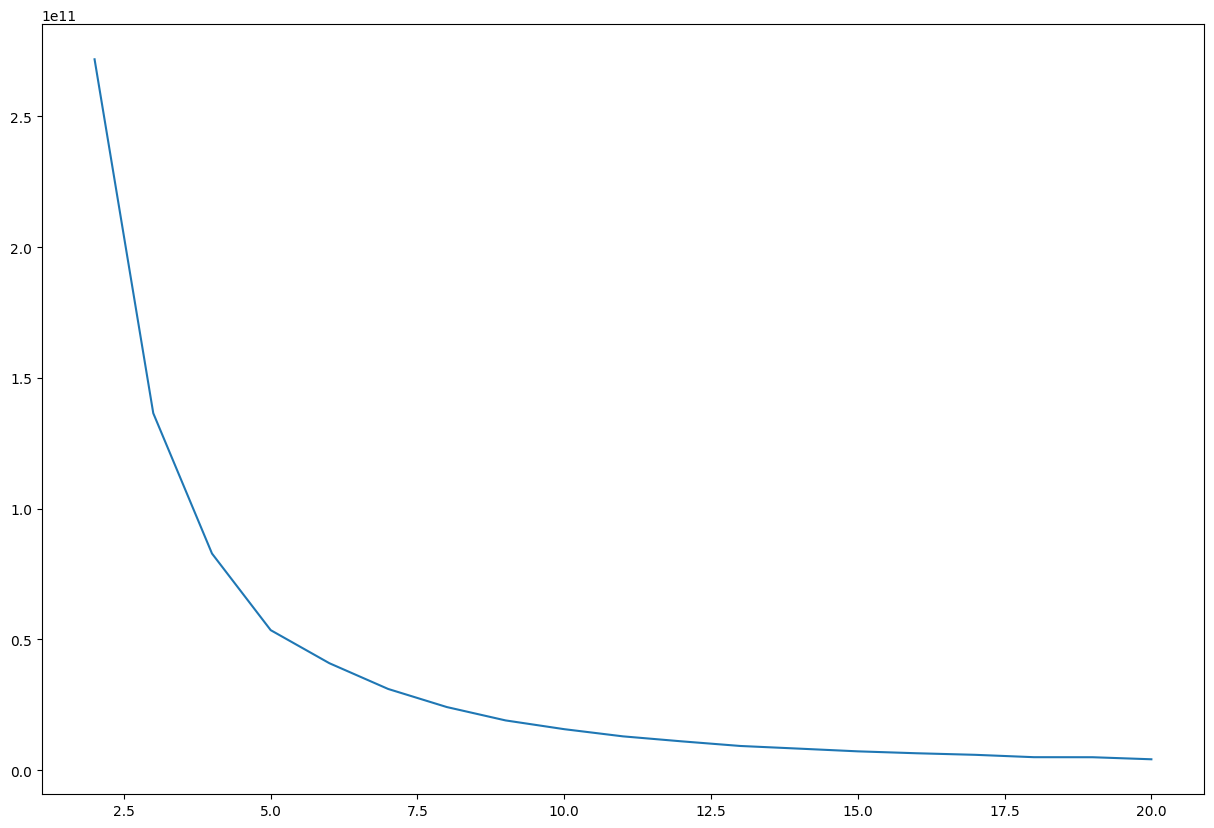

In [77]:
plt.figure(figsize =(15,10))
plt.plot(clusterRange, inertiaRange)

plt.show()

- the number of cluster shall be taken as '5' considering both the "elbow plot" and "silhouette score" 

In [78]:
model = KMeans(n_clusters = 5)
model.fit(Data_Modelling)

KMeans(n_clusters=5)

In [79]:
# Adding the cluster column to Data_Modelling
Data_Modelling['Cluster_Label'] = model.labels_

In [80]:
Data_Modelling.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
0,58138.0,58,0,1,58,1,28,1617,29,3,True,False,False,2
1,46344.0,38,0,0,61,3,9,27,9,2,True,False,False,2
2,71613.0,26,0,0,50,2,16,776,24,1,True,False,False,4
3,26646.0,26,0,0,31,3,10,53,12,2,True,False,False,3
4,58293.0,94,0,0,34,3,11,422,19,5,False,True,False,2


In [81]:
Data_Modelling['Cluster_Label'].value_counts()

Cluster_Label
1    523
2    504
4    500
0    363
3    342
Name: count, dtype: int64

In [82]:
cluster_0_dat = Data_Modelling[Data_Modelling["Cluster_Label"]==0]
cluster_1_dat = Data_Modelling[Data_Modelling["Cluster_Label"]==1]
cluster_2_dat = Data_Modelling[Data_Modelling["Cluster_Label"]==2]
cluster_3_dat = Data_Modelling[Data_Modelling["Cluster_Label"]==3]
cluster_4_dat = Data_Modelling[Data_Modelling["Cluster_Label"]==4]

In [83]:
cluster_0_dat.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
15,82800.0,23,0,1,69,1,25,1315,28,3,False,True,False,0
18,76995.0,91,0,0,66,3,21,1782,29,3,False,True,False,0
29,84618.0,96,0,0,50,2,13,1672,27,2,False,True,False,0
40,80011.0,3,0,0,35,3,20,1395,23,2,True,False,False,0
45,79941.0,72,0,0,39,1,6,984,16,1,True,False,False,0


In [84]:
cluster_1_dat.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
7,33454.0,32,0,0,30,3,20,169,16,2,False,True,False,1
8,30351.0,19,0,1,41,3,19,46,14,1,False,True,False,1
16,41850.0,51,0,0,35,4,24,96,14,3,True,False,False,1
17,37760.0,20,0,0,69,2,28,317,18,2,True,False,False,1
19,33812.0,86,0,0,30,2,26,133,12,2,False,False,True,1


In [85]:
cluster_2_dat.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
0,58138.0,58,0,1,58,1,28,1617,29,3,True,False,False,2
1,46344.0,38,0,0,61,3,9,27,9,2,True,False,False,2
4,58293.0,94,0,0,34,3,11,422,19,5,False,True,False,2
6,55635.0,34,0,0,44,2,25,590,23,4,True,False,False,2
10,51381.5,11,0,0,32,3,13,19,10,1,True,False,False,2


In [86]:
cluster_3_dat.head()

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
3,26646.0,26,0,0,31,3,10,53,12,2,True,False,False,3
9,5648.0,68,0,0,65,4,9,49,21,2,False,True,False,3
11,7500.0,59,0,0,39,2,25,61,13,1,False,False,True,3
14,17323.0,38,0,0,28,2,27,46,12,1,True,False,False,3
21,2447.0,42,0,0,36,3,24,1730,29,15,True,False,False,3


In [87]:
cluster_4_dat

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label
2,71613.0,26,0,0,50,2,16,776,24,1,True,False,False,4
5,62513.0,16,0,0,48,3,15,716,26,2,False,True,False,4
12,63033.0,82,0,0,56,1,13,1102,17,1,True,False,False,4
13,59354.0,53,0,0,63,3,13,310,18,3,False,True,False,4
23,65324.0,0,0,0,61,3,11,544,21,3,False,True,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,61014.0,17,0,0,35,3,29,1147,23,4,True,False,False,4
2226,63777.0,87,0,0,36,4,21,653,26,8,True,False,False,4
2235,61223.0,46,0,0,48,3,18,1341,21,2,True,False,False,4
2236,64014.0,56,0,0,69,5,6,444,22,8,False,True,False,4


### Visualising the Clusters

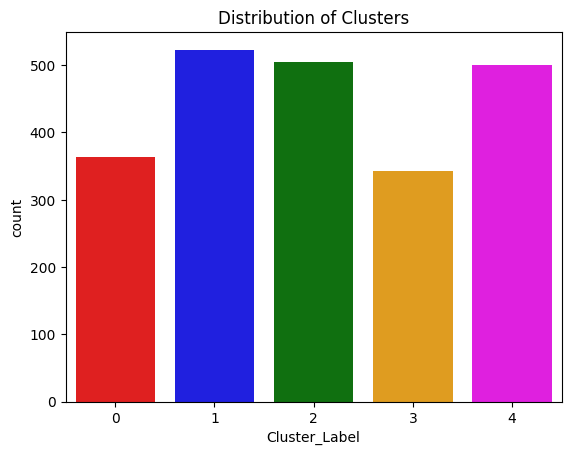

In [88]:
# Defining the color palette
pal = ["red", "blue", "green","orange","magenta"]

# Create the countplot
fig = sns.countplot(x=Data_Modelling["Cluster_Label"], palette=pal)
fig.set_title("Distribution of Clusters")
plt.show()

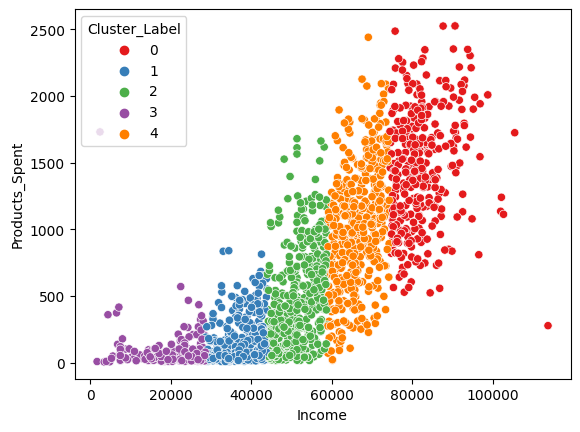

In [89]:
sns.scatterplot(data=Data_Modelling, x='Income', y='Products_Spent', hue='Cluster_Label', palette='Set1')
plt.show()

In [90]:
Data_Modelling['clusters']= Data_Modelling.Cluster_Label.map({2:'Very High',1:'High',4:'Medium',0:'Low',3:'Very Low'})

In [91]:
Data_Modelling

,Income,Recency,Complain,Response,Age,Family_Size,Enrolled_Months,Products_Spent,Place_Spent,Promotion_Spent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Cluster_Label,clusters
0,58138.0,58,0,1,58,1,28,1617,29,3,True,False,False,2,Very High
1,46344.0,38,0,0,61,3,9,27,9,2,True,False,False,2,Very High
2,71613.0,26,0,0,50,2,16,776,24,1,True,False,False,4,Medium
3,26646.0,26,0,0,31,3,10,53,12,2,True,False,False,3,Very Low
4,58293.0,94,0,0,34,3,11,422,19,5,False,True,False,2,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,0,0,48,3,18,1341,21,2,True,False,False,4,Medium
2236,64014.0,56,0,0,69,5,6,444,22,8,False,True,False,4,Medium
2237,56981.0,91,0,0,34,1,11,1241,24,2,True,False,False,2,Very High
2238,69245.0,8,0,0,59,3,11,843,24,2,False,True,False,4,Medium


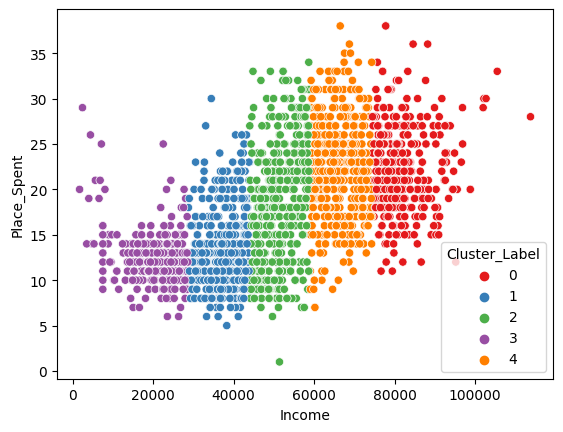

In [92]:
sns.scatterplot(data=Data_Modelling, x='Income', y='Place_Spent', hue='Cluster_Label', palette='Set1')
plt.show()

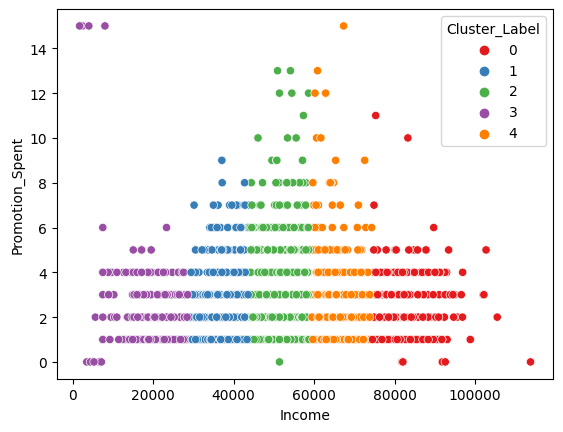

In [93]:
sns.scatterplot(data=Data_Modelling, x='Income', y='Promotion_Spent', hue='Cluster_Label', palette='Set1')
plt.show()

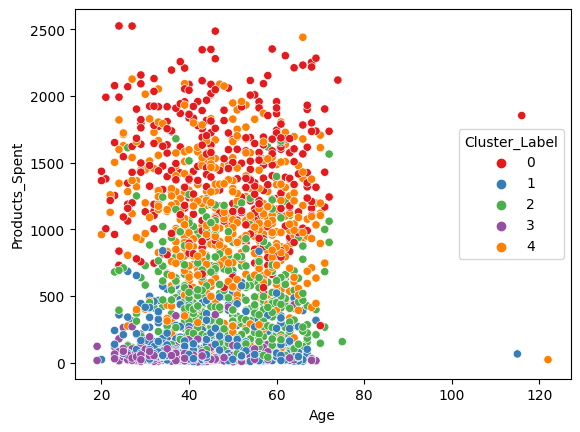

In [94]:
sns.scatterplot(data=Data_Modelling, x='Age', y='Products_Spent', hue='Cluster_Label', palette='Set1')
plt.show()

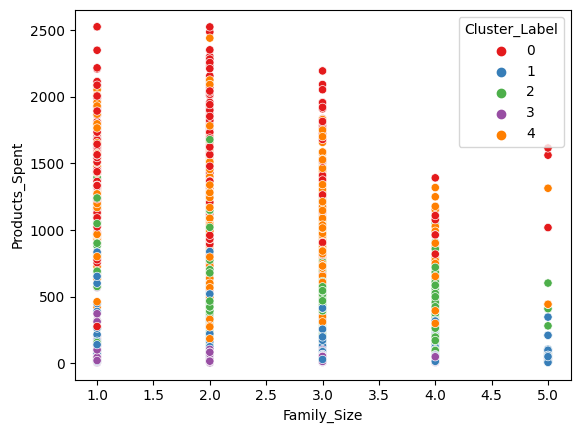

In [95]:
sns.scatterplot(data=Data_Modelling, x='Family_Size', y='Products_Spent', hue='Cluster_Label', palette='Set1')
plt.show()

# Deployment

In [96]:
import pickle

In [97]:
#saving the trained model using pickle
file = open('KMeans_model.pkl','wb')
pickle.dump(model, file)

In [98]:
predictions = pd.DataFrame(model.labels_, columns = ["Cluster"])

In [99]:
predictions.to_csv("Cluster.csv", index = False)

In [100]:
predictions

,Cluster
0,2
1,2
2,4
3,3
4,2
...,...
2227,4
2228,4
2229,2
2230,4


In [101]:
import pickle

In [102]:
file = open("CPAnalysis.pkl",'wb')
pickle.dump(model, file)

In [103]:
predictions.value_counts()

Cluster
1          523
2          504
4          500
0          363
3          342
Name: count, dtype: int64